# Тестовое задание от Дмитрия Пожарского (AGT)

**Исходные данные:**
- На листе pan_product и pan_product_attribut находятся список id товаров и часть внешних кодов (столбец xml);
- На листе ars_tovar находится список внешних кодов и цены на товары. Где sale_price - текущая цена продажи, а baza_price - цена до скидки;
- На листе pan_category_product находится список из id категории и перечня всех товаров в данной категории;
- Необходимо составить список id товаров которые имеют скидку но не находятся в категории с распродажи, кратко описать шаги для решения задачи, формулы сохранить;
- id категории  распродажи 621 622 623

**Декомпозиция задачи:**
- таблицы *pan_product_attribute* и *pan_product* удобнее объединить, так как они имеют идентичную информацию. Объединенную таблицу назовём *pan_product* ;
- сделать срез данных из таблицы *pan_category_product* в который войдут только те товары которые попали под id распродажи;
- в наборе данных *ars_tovar* выбрать только те товары у которых sale_price меньше baza_price. Так мы определим перечень товаров которые имеют скдику;
- из объединенной таблицы *pan_product* с информацией о внешних кодах выбираем айди товаров имеющих скидку (различие цен);
- в завершении делаем срез из тех товаров, айди которых нет в пречне айди полученном из категориальной таблицы.

In [13]:
#импортируем библиотеки для чтения предоставленных файлов:
import pandas as pd
import pathlib

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#задаём путь к нашим файлам
path = pathlib.Path('C:/') / 'Ya' / 'datas' / 'test_agt.xlsx'
print(path)  
pan_product = pd.read_excel(path, sheet_name='pan_product')
pan_product_attribute = pd.read_excel(path, sheet_name='pan_product_attribute')
ars_tovar = pd.read_excel(path, sheet_name='ars_tovar')
pan_category_product = pd.read_excel(path, sheet_name='pan_category_product')

#выводим на экран первые 5 строк имеющихся данных
display(pan_product.head())
display(pan_product_attribute.head())
display(ars_tovar.head())
display(pan_category_product.head())

C:\Ya\datas\test_agt.xlsx


,id_product,xml
0,1726,NaN
1,1733,NaN
2,1734,NaN
3,1735,NaN
4,1736,NaN


,id_product,xml
0,6402,tLGgNc1cg0afQrrLpxp-F0
1,6402,1I8x9cBYi1jzJ3qZUkV9D2
2,253,oOwNlY9UiiUDb5ZHDDlU62
3,413,rcCFWrYigxcY7Cv7EI3T20
4,427,6aBhw8h2jntkFhXytTJgR0


,externalCode,sale_price,baza_price
0,geKVHbqcicyXr-9UJNyMp1,0.0,0.0
1,uHzQZo-fj4CwSKLoy-t2i3,0.0,0.0
2,jpwIAqGqgn2RhGT4fhJ433,0.0,0.0
3,bMXq3qVsg4i4vLUSrQH172,0.0,0.0
4,HnJlOyyghprNn-IwqN0ja2,0.0,0.0


,id_category,id_product
0,75,8
1,75,9
2,75,12
3,75,15
4,75,16


In [14]:
# объединим таблицы pan_product_attribute и pan_product так как они имеют идентичную информацию
pan_product = pd.concat([pan_product_attribute, pan_product], sort=False, axis=0)

#получаем перечень продуктов которые попали в категорию распродаж
in_sales = pan_category_product.query('id_category in (621,622,623)')
idprod_cat = in_sales['id_product'].tolist()

# получаем перечень externalCode тех товаров которые имеют скидку
ars_tovar = ars_tovar.query('sale_price<baza_price')
#задаём переменную которая хранит в себе xml тех товаров на которых есть скидка
xml_in_sales = ars_tovar['externalCode'].tolist()

#получаем айди тех продуктов на которые есть скидка
id_sales = pan_product.query('xml in @xml_in_sales')



In [15]:
#получаем список уникальных значений id_product на которые есть скидка, но они не попали в скидочные категории
final_id = id_sales.query('id_product not in @idprod_cat').reset_index()
print('кол-во товаров не попавших в скидочные категории:', final_id['id_product'].nunique())
final_id = final_id['id_product'].unique()
final_id

кол-во товаров не попавших в скидочные категории: 735


array([3527, 3967, 2567, 3898, 4795, 6239, 6410,  355, 3528, 4767, 4799,
        886, 2518, 2520, 2530, 2531, 2568, 2569, 3588, 3594, 3714, 3584,
       1225, 4885, 2573, 6209, 6211, 6226, 2272, 3833, 6319, 1915,  179,
       4138, 3141, 3159, 4527, 6294, 6520, 6678, 1537,  353,  806,  819,
        827,  829,  834,  842,  844,  860,  871,  875,  911,  917,  958,
        960, 1226, 1273, 1282, 1296, 1333, 1345, 1666, 2454, 2489, 2490,
       2578, 2579, 2580, 2582, 2586, 2588, 2643, 3139, 3140, 3146, 3151,
       3403, 3504, 3706, 3717, 4079, 4080, 4105, 4135, 4829, 4289,  915,
       1366, 1822, 3906, 4560, 4597, 3324, 4081, 3380, 4702, 3713, 4742,
       4974, 6269, 6270, 6271, 1272, 1292, 6297, 1385, 1335, 6302, 6305,
       6320, 6330, 6331, 6659, 6748, 6765, 2549,  892,  189,  191,  220,
        241,  488,  873, 1274, 1276, 1291, 1293, 1336, 1386, 2276, 2277,
       3143, 3442, 3711, 4185, 1363, 4669, 4981, 3138, 4964, 6428,  180,
       6816,  792,  903,  906, 1342, 1354, 1364, 16

**Вывод:**

Таким образом, получилось  **735** товаров на которые есть скидка, но они не попали в категорию распродаж.

**В таблицу ars_tovar  добавим столбец с информацией о проценте скидки и выведем первые 20 строк:**

In [16]:
ars_tovar['per_sale'] = round((ars_tovar['baza_price'] - ars_tovar['sale_price']) / ars_tovar['baza_price'] * 100)
ars_tovar = ars_tovar.sort_values(by='per_sale', ascending=False)
ars_tovar.head(20)

,externalCode,sale_price,baza_price,per_sale
57424,9RLhqwpDi39D66c3mpJxG3,0.0,6800.0,100.0
57425,9RLhqwpDi39D66c3mpJxG3,0.0,6800.0,100.0
57426,9RLhqwpDi39D66c3mpJxG3,0.0,6800.0,100.0
74480,c0WF9BqQha9Vt2ZTKVink0,0.0,52400.0,100.0
57427,9RLhqwpDi39D66c3mpJxG3,0.0,6800.0,100.0
57428,9RLhqwpDi39D66c3mpJxG3,0.0,6800.0,100.0
57429,9RLhqwpDi39D66c3mpJxG3,0.0,6800.0,100.0
42708,1ueaohGIj2gFNroRsnfAi3,99.0,650.0,85.0
42709,iPiMzWPBhqMffL2KXlTVB2,99.0,650.0,85.0
42677,qQRnZ929iFsUNR44gmvOn3,99.0,680.0,85.0


**Вывод:**

Как видим, на 7 товаров из нашего датасета применяется скидка в 100 %, вероятно, это ошибка и записи с таким размером скидок рассматривать не будем

**Построим гистограмму которая будет отбражать то, на какое количество товара применена та или иная скидка**

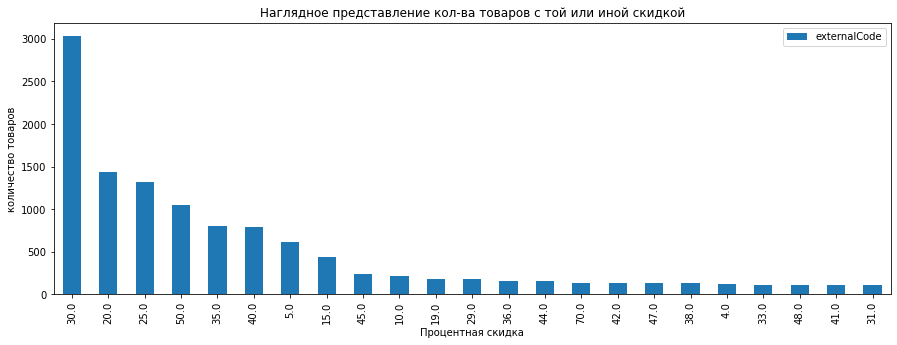

In [17]:
pivot_top10 = (ars_tovar.query('per_sale != 100 ') #удаляем те товары, на которые примененена скидка в 100 %
               .pivot_table(index='per_sale', values=['externalCode'], aggfunc='count') #строим сводную таблицу
               .sort_values(by='externalCode', ascending=False) # сортируем её по убыванию кол-ва товаров
             )

#рассмотрим только те скидки, которые применены к более чем 100 товарам:            
pivot_top10.query('externalCode > 100').plot(kind='bar', linewidth=2, figsize=(15, 5))
plt.title('Наглядное представление кол-ва товаров с той или иной скидкой')
plt.xlabel('Процентная скидка')
plt.ylabel('количество товаров')
plt.show()

**Вывод:**

- Как видим из графика, самая популярная скидка в магазине - это 30 %, количество товаров с этой скидкой вдвое превышает количество товара продаваемого со второй по популярности скидкой - 20 %;
- Исходя из этой информации, имея данные о продажах за тот или иной период можно было бы оценить эффективность работы скидочной системы.

**Для возможности оперировать конкретными величинами составим таблицу отображающую ТОП-10 популярных величин применяемых в магазине скидок**

In [18]:
pivot_top10 = pivot_top10.reset_index()
display(pivot_top10.head(10))

,per_sale,externalCode
0,30.0,3039
1,20.0,1442
2,25.0,1320
3,50.0,1050
4,35.0,809
5,40.0,790
6,5.0,616
7,15.0,445
8,45.0,236
9,10.0,213
